In [1]:
%matplotlib inline

In [20]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model
from datetime import datetime
from sklearn_pandas import DataFrameMapper
import warnings
import timeit
from collections import defaultdict
import tabulate

timeit.template = """
def inner(_it, _timer{init}):
    {setup}
    _t0 = _timer()
    for _i in _it:
        retval = {stmt}
    _t1 = _timer()
    return _t1 - _t0, retval
"""

matplotlib.style.use('ggplot')

RANDOM_SEED = 33

In [3]:
from sklearn.datasets import make_blobs

def generate_train_test_blobs(n_train, n_test=1000, n_features=2, centers=2):
    X, y = make_blobs(n_train + n_test, n_features=n_features, centers=centers)
    X_train, y_train = X[:n_train], y[:n_train]
    X_test, y_test = X[n_train:], y[n_train:]
    return X_train, y_train, X_test, y_test

Since the data generated is from a Gaussian mixture, the RBF kernel makes perfect sense

In [14]:
svm = SVC()
X_train, y_train, X_test, y_test = generate_train_test_blobs(2000)
def fit_function():
    return svm.fit(X_train, y_train)

train_time, train_result = timeit.timeit(fit_function, number=3)

def classify_function():
    return svm.predict(X_test)

classification_time, classification_result = timeit.timeit(classify_function, number=3)

prediction_accuracy = np.sum(y_test == classification_result) / y_test.shape[0]
    

In [17]:
np.sum(classification_result == y_test)

1000

In [12]:
from sklearn.svm import SVC

DATA_SIZES = [2 ** x for x in range(10, 17)]

results = defaultdict(dict)

for data_size in DATA_SIZES:
    print(data_size)
    svm = SVC()
    X_train, y_train, X_test, y_test = generate_train_test_blobs(data_size)
    
    def fit_function():
        return svm.fit(X_train, y_train)
        
    train_time, train_result = timeit.timeit(fit_function, number=3)
    results[data_size]['train_time'] = train_time
    
    def classify_function():
        return svm.predict(X_test)
        
    classification_time, classification_result = timeit.timeit(classify_function, number=3)
    results[data_size]['classification_time'] = classification_time
    
    prediction_accuracy = np.sum(y_test == classification_result) / y_test.shape[0]
    results[data_size]['prediction_accuracy'] = prediction_accuracy
    

1024
2048
4096
8192
16384
32768
65536


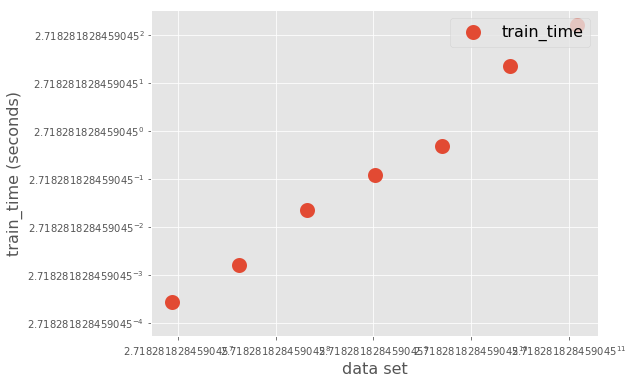

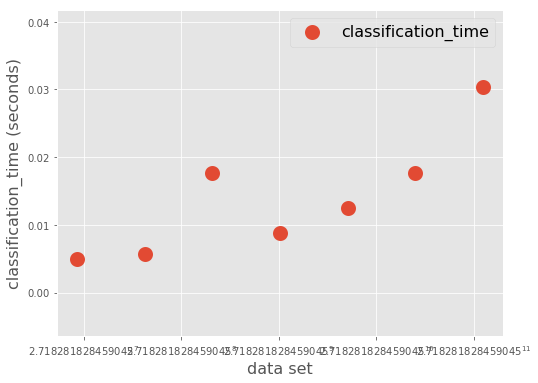

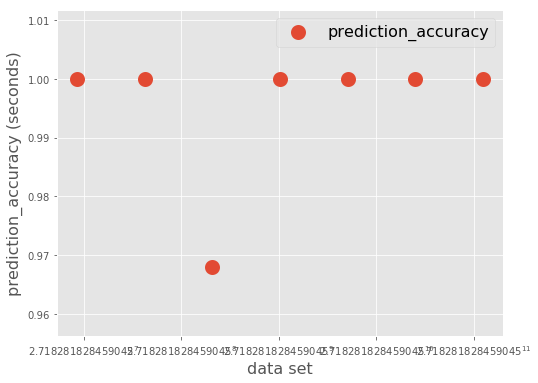

In [39]:
def plot_data_set(results, key, x=DATA_SIZES, log_y=True):
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.scatter(x, [results[size][key] for size in x], lw=9, label=key)
    ax.set_xscale('log', basex=np.exp(1))
    if log_y: ax.set_yscale('log', basey=np.exp(1))
    plt.legend(loc=1, fontsize=16)
    plt.xlabel('data set', size=16)
    plt.ylabel(key + ' (seconds)' , size=16)
    plt.show()

plot_data_set(results, 'train_time')
plot_data_set(results, 'classification_time', log_y=False)
plot_data_set(results, 'prediction_accuracy', log_y=False)


In [24]:
headers = ('data_size', 'train_time', 'classification_time', 'prediction_accuracy')
table_data = [[size] + [results[size][header] for header in headers[1:]] for size in DATA_SIZES]
print(tabulate.tabulate(table_data, headers, tablefmt='fancy_grid'))

╒═════════════╤══════════════╤═══════════════════════╤═══════════════════════╕
│   data_size │   train_time │   classification_time │   prediction_accuracy │
╞═════════════╪══════════════╪═══════════════════════╪═══════════════════════╡
│        1024 │    0.0280465 │            0.00497806 │                 1     │
├─────────────┼──────────────┼───────────────────────┼───────────────────────┤
│        2048 │    0.0611751 │            0.00576765 │                 1     │
├─────────────┼──────────────┼───────────────────────┼───────────────────────┤
│        4096 │    0.19041   │            0.0177196  │                 0.968 │
├─────────────┼──────────────┼───────────────────────┼───────────────────────┤
│        8192 │    0.392609  │            0.00882114 │                 1     │
├─────────────┼──────────────┼───────────────────────┼───────────────────────┤
│       16384 │    0.731746  │            0.0125187  │                 1     │
├─────────────┼──────────────┼──────────────────────

In [36]:
from sklearn.linear_model import LinearRegression

log_x = np.log(DATA_SIZES)
log_x = log_x.reshape((-1, 1))
log_y = np.log([results[size]['train_time'] for size in DATA_SIZES])
log_y = log_y.reshape((-1, 1))

reg = LinearRegression()
reg.fit(log_x, log_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print(reg.score(log_x, log_y), reg.coef_)

0.987380534093 [[ 1.38898175]]
